### Download Required packages

In [3]:
import glob
import csv
import pandas
import numpy
import matplotlib
import seaborn
import scipy
import sklearn
from collections import OrderedDict

In [4]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [5]:
def filenameGen(name):
    val= name.split("--")[0]
    filename = val.split("/")[4]
    return filename

In [6]:
#def processDf(df):
def processDf(df,metric):
    df=df[~(df['kbmemfree'] == "kbmemfree")]
    #cols = ['pgpgin/s', 'pgpgout/s', 'fault/s','majflt/s', 'pgfree/s', 'pgscank/s', 'pgscand/s', 'pgsteal/s','%vmeff', 'PM.1', 'kbmemfree', 'kbmemused', '%memused','kbbuffers', 'kbcached', 'kbcommit', '%commit', 'kbactive','kbinact', 'kbdirty', 'kbswpfree', 'kbswpused','%swpused', 'kbswpcad', '%swpcad']
    cols = df.columns
    colstr = ['HostName', 'TimeStamp', 'PM','PM.1','PM.2', 'AM',  'AM.1','AM.2']
    
    for coln in cols:
        if coln in colstr:
            df[coln] = df[coln].astype(str)
        else:
            #df[coln] = pd.to_numeric(df[coln], errors="coerce")
            df[coln] = df[coln].astype(str).astype(float)
            df.dropna(axis=0, inplace=True)
            #df.info()
    
    #resDf = df.groupby('HostName').agg(numpy.mean)
    #resDf.reset_index(inplace=True)
    #resDf = df[["kbmemused"]].describe(include='all')
    resDf = df[["%memused",'pgpgin/s', 'pgpgout/s', 'fault/s', 'majflt/s', 'kbbuffers', 'kbcached']].describe(include='all')
    #resDf = df[["kbmemused"]].describe()
    #resDf = df.groupby('HostName').agg([np.mean, np.min , np.max, np.std, np.median])
    #return resDf
    return resDf.loc[metric]

In [7]:
filenames = glob.glob("/home/tpc/artifacts/*patResults/instruments/MEMORY.csv")
list_of_dfs = [pd.read_csv(filename) for filename in filenames]
fileNamDict = {}
for eachfile in filenames:
    fileNamDict[eachfile] = filenameGen(eachfile)
    print(filenameGen(eachfile))

SingleQuery24sf100datanodes6
SingleQuery23sf100datanodes6
SingleQuery25sf100datanodes6
SingleQuery2sf100datanodes6
SingleQuery30sf100datanodes6
SingleQuery18sf100datanodes6
SingleQuery8sf100datanodes6
SingleQuery11sf100datanodes6
SingleQuery13sf100datanodes6
SingleQuery17sf100datanodes6
SingleQuery20sf100datanodes6
SingleQuery1sf100datanodes6
SingleQuery29sf100datanodes6
SingleQuery3sf100datanodes6
SingleQuery9sf100datanodes6
SingleQuery21sf100datanodes6
SingleQuery27sf100datanodes6
SingleQuery22sf100datanodes6
SingleQuery14sf100datanodes6
SingleQuery19sf100datanodes6
SingleQuery15sf100datanodes6
SingleQuery28sf100datanodes6
SingleQuery26sf100datanodes6
SingleQuery5sf100datanodes6
SingleQuery7sf100datanodes6
SingleQuery4sf100datanodes6
SingleQuery6sf100datanodes6
SingleQuery16sf100datanodes6
SingleQuery12sf100datanodes6
SingleQuery10sf100datanodes6


In [8]:
filenames = glob.glob("/home/tpc/artifacts/*patResults/instruments/MEMORY.csv")
list_of_dfs = [pd.read_csv(filename) for filename in filenames]

fileNamDict = {}
for eachfile in filenames:
    fileNamDict[eachfile] = filenameGen(eachfile)

    
finDataset = OrderedDict()
finDatasetCnt = OrderedDict()
finDatasetStd = OrderedDict()
finDatasetMean = OrderedDict()
finDatasetMin = OrderedDict()
finDataset25Per = OrderedDict()
finDataset50Per = OrderedDict()
finDataset75Per = OrderedDict()
finDatasetMax = OrderedDict()

for dataframe, querName in zip(list_of_dfs, filenames):
    QueryName = filenameGen(querName)
    finDatasetMean[QueryName] = processDf(dataframe,"mean")    

/home/tpc/hs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/tpc/hs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/tpc/hs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

In [9]:
dfMean = pd.DataFrame(finDatasetMean)

In [10]:
for col in dfMean.select_dtypes([np.object]).columns:
    print(df[col].str.slice(1,5))

In [11]:
num_cols = ['SingleQuery1sf100datanodes6','SingleQuery2sf100datanodes6','SingleQuery3sf100datanodes6','SingleQuery4sf100datanodes6','SingleQuery5sf100datanodes6','SingleQuery6sf100datanodes6','SingleQuery7sf100datanodes6','SingleQuery8sf100datanodes6','SingleQuery9sf100datanodes6','SingleQuery10sf100datanodes6','SingleQuery11sf100datanodes6','SingleQuery12sf100datanodes6','SingleQuery13sf100datanodes6','SingleQuery14sf100datanodes6','SingleQuery15sf100datanodes6','SingleQuery16sf100datanodes6','SingleQuery17sf100datanodes6','SingleQuery18sf100datanodes6','SingleQuery19sf100datanodes6','SingleQuery20sf100datanodes6','SingleQuery21sf100datanodes6','SingleQuery22sf100datanodes6','SingleQuery23sf100datanodes6','SingleQuery24sf100datanodes6','SingleQuery25sf100datanodes6','SingleQuery26sf100datanodes6','SingleQuery27sf100datanodes6','SingleQuery28sf100datanodes6','SingleQuery29sf100datanodes6','SingleQuery30sf100datanodes6']

In [19]:
df = dfMean[num_cols].to_csv("./SingleQuery_DN6_all30_MEMORYmean.csv")

Text(0.5,0,'Mean: Memory utilization of Hive Queries - diff SF and 5 datanodes')

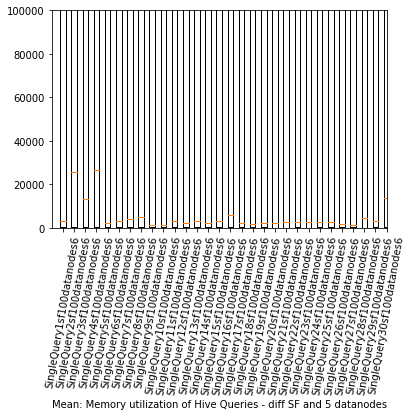

In [16]:
num_cols = ['SingleQuery1sf100datanodes6','SingleQuery2sf100datanodes6','SingleQuery3sf100datanodes6','SingleQuery4sf100datanodes6','SingleQuery5sf100datanodes6','SingleQuery6sf100datanodes6','SingleQuery7sf100datanodes6','SingleQuery8sf100datanodes6','SingleQuery9sf100datanodes6','SingleQuery10sf100datanodes6','SingleQuery11sf100datanodes6','SingleQuery12sf100datanodes6','SingleQuery13sf100datanodes6','SingleQuery14sf100datanodes6','SingleQuery15sf100datanodes6','SingleQuery16sf100datanodes6','SingleQuery17sf100datanodes6','SingleQuery18sf100datanodes6','SingleQuery19sf100datanodes6','SingleQuery20sf100datanodes6','SingleQuery21sf100datanodes6','SingleQuery22sf100datanodes6','SingleQuery23sf100datanodes6','SingleQuery24sf100datanodes6','SingleQuery25sf100datanodes6','SingleQuery26sf100datanodes6','SingleQuery27sf100datanodes6','SingleQuery28sf100datanodes6','SingleQuery29sf100datanodes6','SingleQuery30sf100datanodes6']
#num_cols = dfMean.columns


fig, ax = plt.subplots()
ax.boxplot(dfMean[num_cols].values)
ax.set_xticklabels(num_cols, rotation=80)
ax.set_xlim(0,30)
ax.set_ylim(0,100000)
ax.set_xlabel("Hive diff confTuning runs")
ax.set_xlabel("Mean: Memory utilization of Hive Queries - diff SF and 5 datanodes")

In [17]:
dfMean.head()

,SingleQuery24sf100datanodes6,SingleQuery23sf100datanodes6,SingleQuery25sf100datanodes6,SingleQuery2sf100datanodes6,SingleQuery30sf100datanodes6,SingleQuery18sf100datanodes6,SingleQuery8sf100datanodes6,SingleQuery11sf100datanodes6,SingleQuery13sf100datanodes6,SingleQuery17sf100datanodes6,...,SingleQuery15sf100datanodes6,SingleQuery28sf100datanodes6,SingleQuery26sf100datanodes6,SingleQuery5sf100datanodes6,SingleQuery7sf100datanodes6,SingleQuery4sf100datanodes6,SingleQuery6sf100datanodes6,SingleQuery16sf100datanodes6,SingleQuery12sf100datanodes6,SingleQuery10sf100datanodes6
%memused,64.092051,65.852059,44.402156,67.132500,66.594204,63.687253,64.524898,63.393973,64.006376,63.703074,...,64.440559,45.859683,43.873868,45.321196,74.447048,77.940000,76.496667,64.285971,63.197222,64.821879
pgpgin/s,523.238095,36.917647,1184.964156,834.495918,624.311449,480.317411,743.220991,648.482143,770.160105,661.028571,...,693.098137,154.669841,523.813240,703.540199,595.870476,708.470991,538.857143,723.350857,880.409524,467.874016
pgpgout/s,2808.088828,2615.187983,2636.209610,25783.030995,13736.354163,1723.149805,5093.996501,3039.737634,3204.355052,2195.141126,...,2984.546584,4332.111111,1781.719861,2318.107641,3862.540000,26844.378980,3157.207873,5719.245714,2040.663492,1388.550776
fault/s,139202.221245,84339.997185,131077.789169,145671.471658,113322.194551,34309.473309,98977.978426,119289.709821,148454.912892,59029.239827,...,127914.803727,84077.870635,82532.349826,109084.672425,53132.700825,160043.482974,153069.474381,122749.483429,39164.147619,12577.920326
majflt/s,0.057143,0.106723,0.150130,0.045918,0.087347,0.053480,0.101458,0.061607,0.121254,0.061472,...,0.159006,0.095238,0.050174,0.071761,0.041270,0.089796,0.098413,0.140000,0.051587,0.076490


In [24]:
!pwd

/home/tpc/hs/anaconda2/bin
